In [8]:
# V2: Using Undirected Graphs
import networkx as nx
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
from scipy import mgrid
import time
from networkx.algorithms.shortest_paths import all_pairs_shortest_path
import sys

In [3]:
'''
if sys.argv[0].split('\\')[-1] != 'ipykernel_launcher.py':
    if len(sys.argv) < 7:
        print("Wrong format.")
        print("Try 'python SNAProject.py <N> <Pgd> <Pcn> <Pjc> <Paa> <Ppa> [<Data Percentage>]'")
    else:
        N = sys.argv[1]
        Pgd = sys.argv[2]
        Pcn = sys.argv[3]
        Pjc = sys.argv[4]
        Paa = sys.argv[5]
        Ppa = sys.argv[6]
        try:
            PERCENTAGE = sys.argv[7]
        except Exception:
            PERCENTAGE = 0.005

else:
    N = 200
    Pgd = 0.6
    Pcn = 0.6
    Pjc = 0.6
    Paa = 0.6
    Ppa = 0.6
    PERCENTAGE = 0.005
'''

In [9]:
N = 200
Pgd = 0.6
Pcn = 0.6
Pjc = 0.6
Paa = 0.6
Ppa = 0.6
PERCENTAGE = 0.005

In [10]:
ALL_RECORDS = 63497049
# Keep only 0.5% of samples.

skip = ceil(ALL_RECORDS*(1-PERCENTAGE))
print("Loading data...")
data = pd.read_csv('sx-stackoverflow.txt', sep=" ", header=0, names=['source', 'target', 'timestamp'], dtype={'source': np.int32, 'target': np.int32, 'timestamp': np.int32}, skiprows=skip)
print("Done!")

Loading data...
Done!


In [11]:
# 1 Calculating t_min t_max
t_min = data.iloc[0,2]
t_max = data.iloc[-1,2]
print(f"t_min: {t_min}, t_max: {t_max}")

t_min: 1456431641, t_max: 1457273428


In [12]:
# 2 Calculating time intervals

Dt = t_max - t_min
dt = ceil(Dt/N)

t = [t_min + j * dt for j in range(N + 1)]
#print(t)
T = [[t[i], t[i + 1] - 1] for i in range(N)]
T[-1][1] = t_max # eliminate remainders
print(f"N: {N}, Dt: {Dt}, dt: {dt}")
for i in range(len(T)):
    pass
    print(f"T[{i}, {i+1}]: [{T[i][0]}, {T[i][1]}]")


N: 200, Dt: 841787, dt: 4209
T[0, 1]: [1456431641, 1456435849]
T[1, 2]: [1456435850, 1456440058]
T[2, 3]: [1456440059, 1456444267]
T[3, 4]: [1456444268, 1456448476]
T[4, 5]: [1456448477, 1456452685]
T[5, 6]: [1456452686, 1456456894]
T[6, 7]: [1456456895, 1456461103]
T[7, 8]: [1456461104, 1456465312]
T[8, 9]: [1456465313, 1456469521]
T[9, 10]: [1456469522, 1456473730]
T[10, 11]: [1456473731, 1456477939]
T[11, 12]: [1456477940, 1456482148]
T[12, 13]: [1456482149, 1456486357]
T[13, 14]: [1456486358, 1456490566]
T[14, 15]: [1456490567, 1456494775]
T[15, 16]: [1456494776, 1456498984]
T[16, 17]: [1456498985, 1456503193]
T[17, 18]: [1456503194, 1456507402]
T[18, 19]: [1456507403, 1456511611]
T[19, 20]: [1456511612, 1456515820]
T[20, 21]: [1456515821, 1456520029]
T[21, 22]: [1456520030, 1456524238]
T[22, 23]: [1456524239, 1456528447]
T[23, 24]: [1456528448, 1456532656]
T[24, 25]: [1456532657, 1456536865]
T[25, 26]: [1456536866, 1456541074]
T[26, 27]: [1456541075, 1456545283]
T[27, 28]: [145654

In [13]:
# 3 Calculating undirected Graphs
print(f"Calculating undirected graphs for {N} time intervals.")

G = []
ti = 0
g = nx.Graph()
for i, r in data.iterrows():
    if r['timestamp'] < T[ti][1]:
        g.add_edge(r['source'], r['target'])
    else:
        G.append(g)
        g = nx.Graph()
        g.add_edge(r['source'], r['target'])
        ti += 1
print("Done!")

Calculating undirected graphs for 200 time intervals.
Done!


In [45]:
'''
# Printing number of edges for each subgraph
for i in range(len(G)):
    print(len(G[i].edges))
'''

'\n# Printing number of edges for each subgraph\nfor i in range(len(G)):\n    print(len(G[i].edges))\n'

In [14]:
def get_centralities(func, G):

    if func == nx.in_degree_centrality or func == nx.out_degree_centrality:
        G = nx.DiGraph(G)

    if func == nx.eigenvector_centrality or func == nx.katz_centrality:
        centr = func(G, max_iter=10000)
    else:
        centr = func(G)

    return centr


In [15]:
# 4 Calculating centrality metrics.
degree_centralities = []
in_degree_centralities = []
out_degree_centralities = []
closeness_centralities = []
betweenness_centralities = []
eigenvector_centralities = []
katz_centralities = []

start = time.time()
print("Calculating degree centralities for each graph.")
for i in range(len(G)):
    degree_centralities.append(get_centralities(nx.degree_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')

start = time.time()
print("Calculating in degree centralities for each graph. (Converted into directed graphs)")
for i in range(len(G)):
    in_degree_centralities.append(get_centralities(nx.in_degree_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')

start = time.time()
print("Calculating out degree centralities for each graph. (Converted into directed graphs)")
for i in range(len(G)):
    out_degree_centralities.append(get_centralities(nx.out_degree_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')

start = time.time()
print("Calculating closeness centralities for each graph. (Estimated execution time: 14'')")
for i in range(len(G)):
    closeness_centralities.append(get_centralities(nx.closeness_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')
    
start = time.time()
print("Calculating betweenness centralities for each graph. (Estimated execution time: 250'')")
for i in range(len(G)):
    betweenness_centralities.append(get_centralities(nx.betweenness_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')

start = time.time()
print("Calculating eigenvector centralities for each graph. (Estimated execution time: 84'')")
for i in range(len(G)):
    eigenvector_centralities.append(get_centralities(nx.eigenvector_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')

start = time.time()
print("Calculating katz centralities for each graph. (Estimated execution time: 12'')")
for i in range(len(G)):
    katz_centralities.append(get_centralities(nx.katz_centrality, G[i]))
print("Done! Execution time:", time.time() - start, '\n')
        


Calculating degree centralities for each graph.
Done! Execution time: 0.13660478591918945 

Calculating in degree centralities for each graph. (Converted into directed graphs)
Done! Execution time: 1.5468928813934326 

Calculating out degree centralities for each graph. (Converted into directed graphs)
Done! Execution time: 1.609691858291626 

Calculating closeness centralities for each graph. (Estimated execution time: 14'')
Done! Execution time: 13.502883911132812 

Calculating betweenness centralities for each graph. (Estimated execution time: 250'')
Done! Execution time: 222.1573040485382 

Calculating eigenvector centralities for each graph. (Estimated execution time: 84'')
Done! Execution time: 85.26569414138794 

Calculating katz centralities for each graph. (Estimated execution time: 12'')
Done! Execution time: 12.35606050491333 



In [16]:
def set_size(w,h, ax=None):
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

def nine_plot_centralities(centralities, bins=None):
    fig, ax = plt.subplots(3, 3)
    set_size(10,10)
    
    for i in range(9):
        ax[i // 3, i % 3].hist(centralities[i].values(), bins='doane', align='left')
        

Plotting last nine degree centralities histograms.



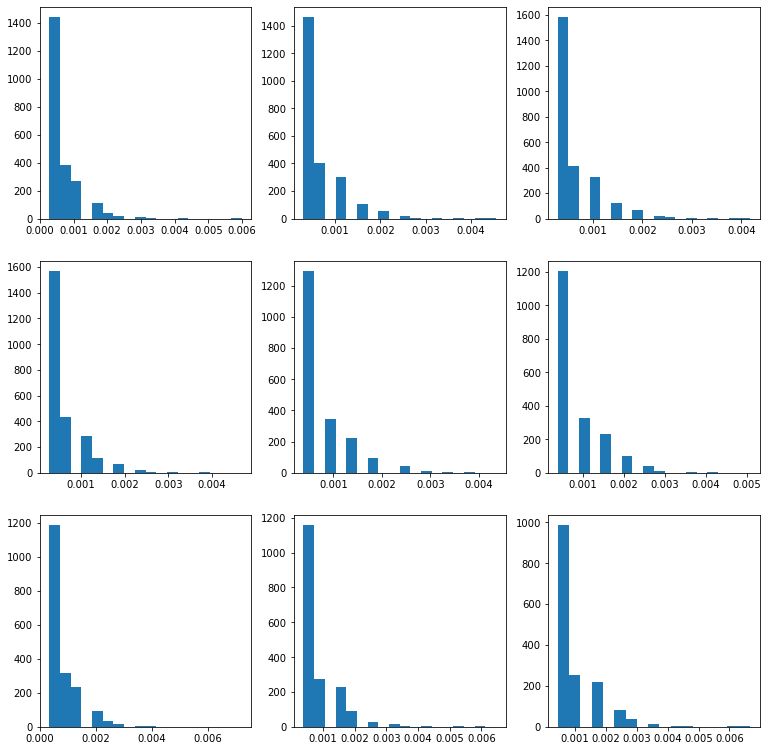

In [17]:
print("Plotting last nine degree centralities histograms.")
nine_plot_centralities(degree_centralities, 'doane')
print()

Plotting last nine in degree centralities histograms.



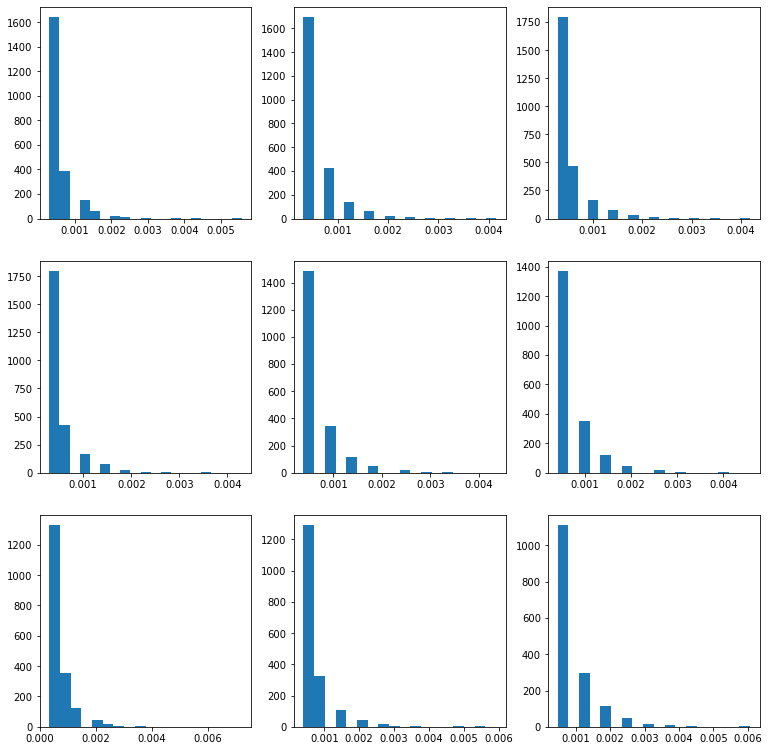

In [18]:
print("Plotting last nine in degree centralities histograms.")
nine_plot_centralities(in_degree_centralities)
print()

Plotting last nine out degree centralities histograms.



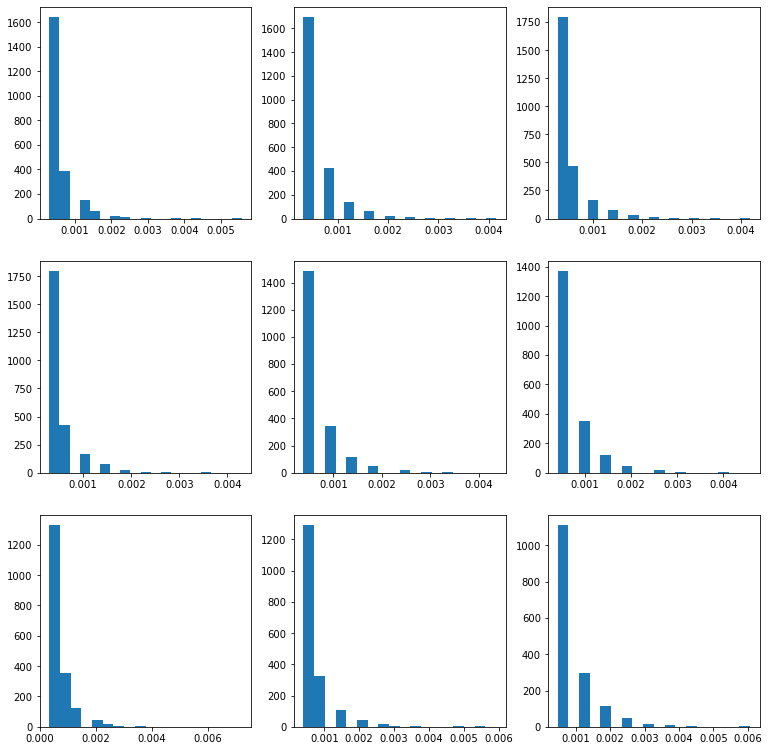

In [19]:
print("Plotting last nine out degree centralities histograms.")
nine_plot_centralities(out_degree_centralities)
print()

Plotting last nine closeness centralities histograms.



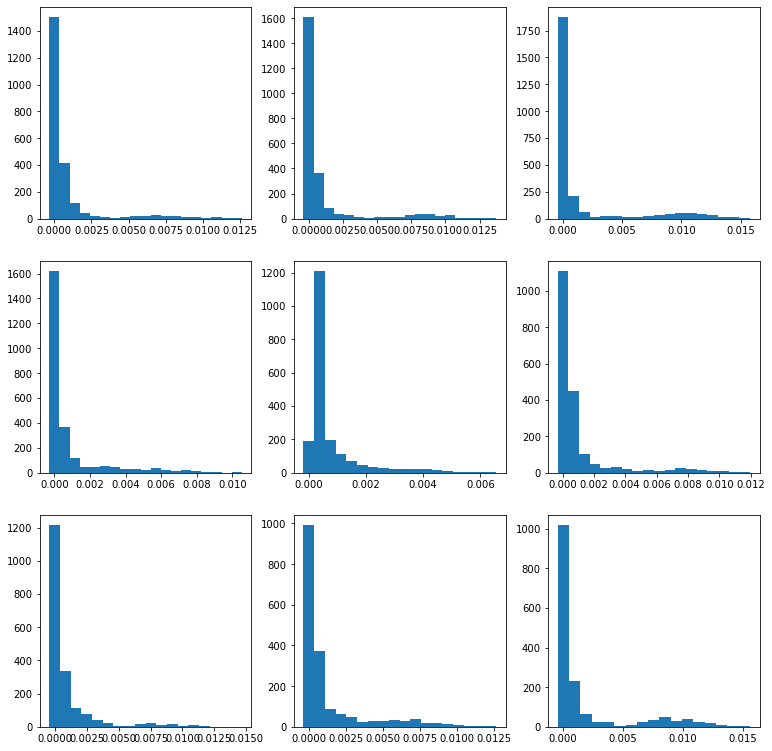

In [20]:
print("Plotting last nine closeness centralities histograms.")
nine_plot_centralities(closeness_centralities)
print()

Plotting last nine betweenness centralities histograms.



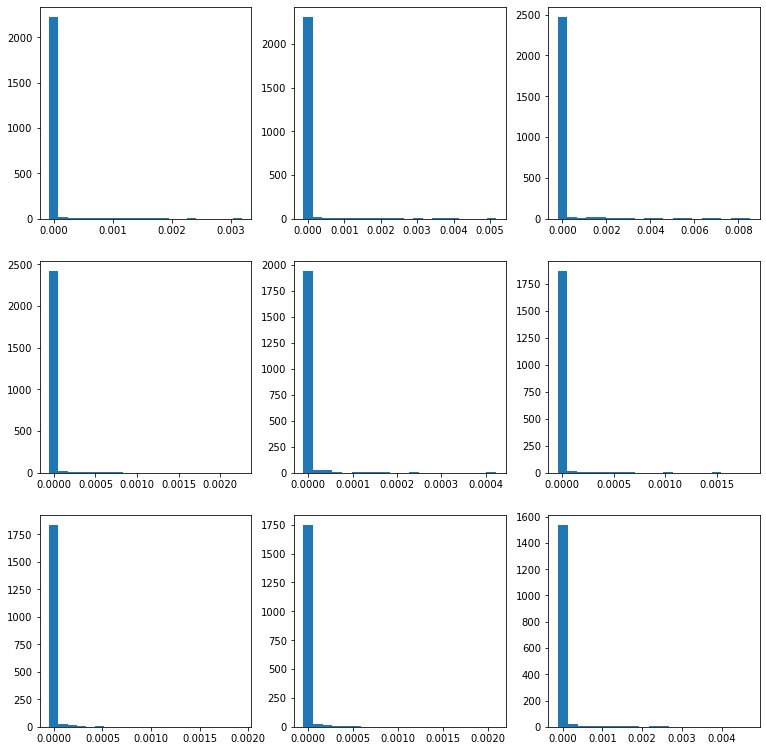

In [21]:
print("Plotting last nine betweenness centralities histograms.")
nine_plot_centralities(betweenness_centralities)
print()

Plotting last nine eigenvector centralities histograms.



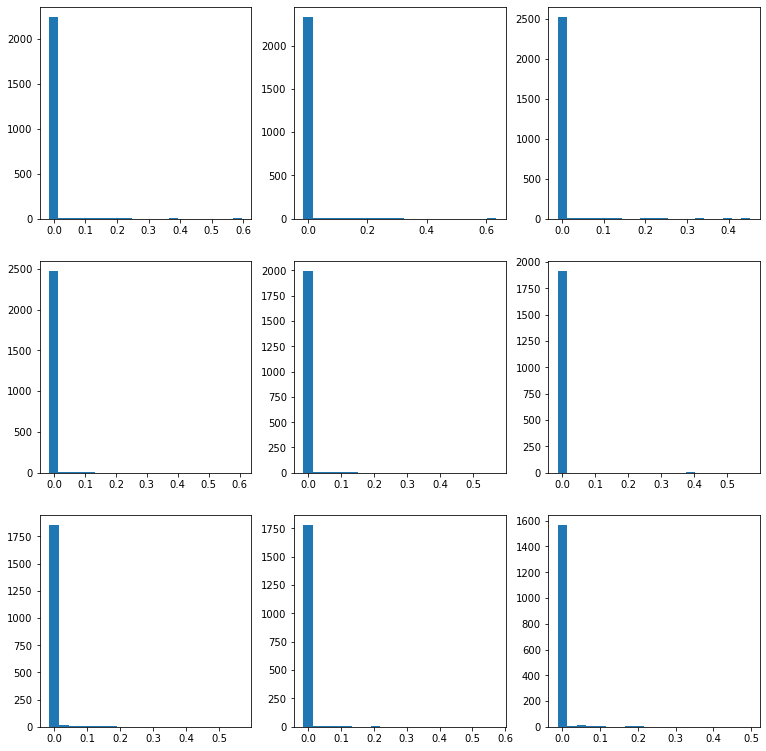

In [22]:
print("Plotting last nine eigenvector centralities histograms.")
nine_plot_centralities(eigenvector_centralities)
print()

Plotting last nine katz centralities histograms.



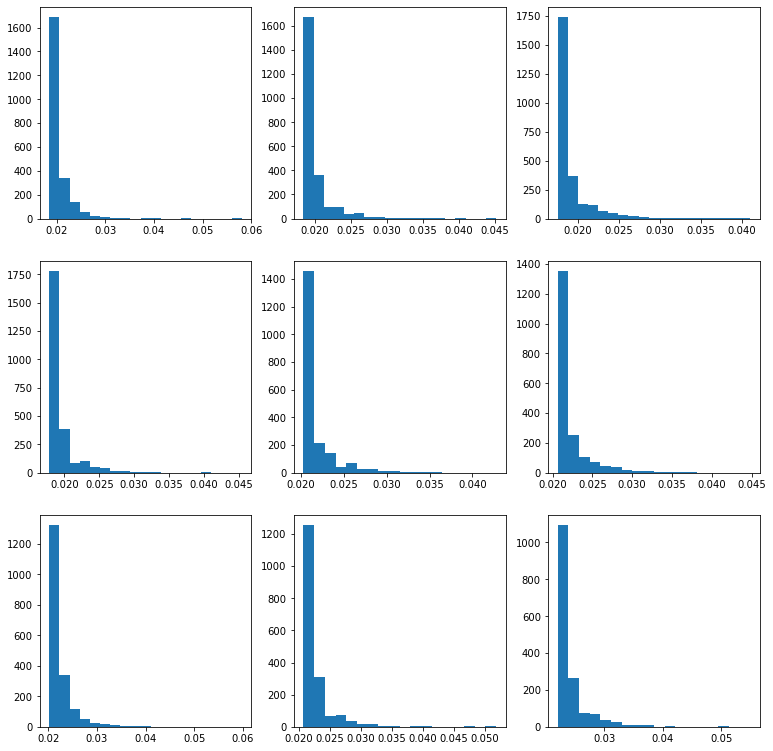

In [23]:
print("Plotting last nine katz centralities histograms.")
nine_plot_centralities(katz_centralities)
print()

In [24]:
# 5 Calculating V*
print("Calculating V* for every two consecutive intervals.")
V_star = []
for i in range(1, N - 1):
    v_0 = set(G[i-1].nodes)
    v_1 = set(G[i].nodes)
    intersection = list(v_0 & v_1)
    V_star.append(intersection)
print("Done!\n")


Calculating V* for every two consecutive intervals.
Done!



In [25]:
# Calculating E*
# E[j][0] the previous time interval (set 7 in SocialNetworksAnalysisAssignment.pdf), 
# E[j][1] the next time interval (set 8 in SocialNetworksAnalysisAssignment.pdf)

print("Calculating E* for each time interval.")
E_star = []
j = 0
for i in range(1, N-1):
    e_0 = []
    for e in list(G[i-1].edges):
        u,v = e
        if u in V_star[j] and v in V_star[j]:
            e_0.append((u,v))
    e_1 = []
    for e in list(G[i].edges):
        u,v = e
        if u in V_star[j] and v in V_star[j]:
            e_1.append((u,v))
    E_star.append([e_0, e_1])
    j += 1
print("Done!\n")

Calculating E* for each time interval.
Done!



In [31]:
def get_similarity_dict(func, G):
    if func == nx.all_pairs_shortest_path_length:
        sim_dict = dict(func(G))

    elif func == nx.common_neighbors:
        sim_dict = {}
        for u in G.nodes:
            dict_u = {}
            for v in G.nodes:
                cnbors  = func(G, u, v)
                n_cnbors = sum(1 for _ in cnbors)
                dict_u[v] = n_cnbors
            sim_dict[u] = dict_u

    elif func == nx.jaccard_coefficient or func == nx.preferential_attachment:
        results = func(G, ebunch=G.edges)
        sim_dict = {k: {v: s} for k,v,s in results}

    elif func == nx.adamic_adar_index:
        G = G.copy()
        G.remove_edges_from(nx.selfloop_edges(G))
        results = func(G, ebunch=G.edges)
        sim_dict = {k: {v: s} for k,v,s in results}

    else:
        raise Exception("Not implemented for this function")
    return sim_dict

In [32]:
# 6 Creating G*s, where G*_j = (V*_j, E*_j[0])
print("Calclating G* for each V*. [G*_j = (V*_j, E*_j[0])]")
G_star = []
for i in range(len(V_star)):
    g = nx.Graph()
    for node in V_star[i]:
        g.add_node(node)
    for source, target in E_star[i][0]:
        g.add_edge(source, target)
    G_star.append(g)
print("Done!")

Calclating G* for each V*. [G*_j = (V*_j, E*_j[0])]
Done!


In [33]:
start = time.time()
print("Calculating Sdg for each G*.")
Sgd = [get_similarity_dict(nx.all_pairs_shortest_path_length, G_star[i]) for i in range(len(G_star))]
print("Done! Execution time: ", time.time()-start, "\n")

start = time.time()
print("Calculating Scn for each G*. (Estimated execution time: 120'')")
Scn = [get_similarity_dict(nx.common_neighbors, G_star[i]) for i in range(len(G_star))]
print("Done! Execution time: ", time.time()-start, "\n")

start = time.time()
print("Calculating Sjc for each G*.")
Sjc = [get_similarity_dict(nx.jaccard_coefficient, G_star[i]) for i in range(len(G_star))]
print("Done! Execution time: ", time.time()-start, "\n")

start = time.time()
print("Calculating Saa for each G*.")
Saa = [get_similarity_dict(nx.adamic_adar_index, G_star[i]) for i in range(len(G_star))]
print("Done! Execution time: ", time.time()-start, "\n")

start = time.time()
print("Calculating Spa for each G*.")
Spa = [get_similarity_dict(nx.preferential_attachment, G_star[i]) for i in range(len(G_star))]
print("Done! Execution time: ", time.time()-start, "\n")


Calculating Sdg for each G*.
Done! Execution time:  0.6584463119506836 

Calculating Scn for each G*. (Estimated execution time: 120'')
Done! Execution time:  116.80488395690918 

Calculating Sjc for each G*.
Done! Execution time:  0.4378342628479004 

Calculating Saa for each G*.
Done! Execution time:  0.4031808376312256 

Calculating Spa for each G*.
Done! Execution time:  0.16264581680297852 



In [35]:
def get_min_max_value_of_similarity(similarity):
    val = []
    for u in similarity:
        for v in similarity[u]:
            val.append(similarity[u][v])
    return (min(val), max(val))


def get_decision(p, s):
    s_decision = []
    for i in range(len(s)):
        min_val, max_val = get_min_max_value_of_similarity(s[i])
        decision = []
        for u in s[i].keys():
            for v in s[i][u].keys():
                if u == v:
                    continue
                value = s[i][u][v]
                if value >= p * max_val:
                    decision.append((u,v))
        s_decision.append(decision)
    return s_decision


def predict(decision):
    right_prediction = []
    for i in range(len(decision)):
        edges_exist = 0
        for u,v in decision[i]:
            if (u,v) in E_star[i][1]:
                edges_exist +=1

        if edges_exist == 0 and len(decision[i]) == 0 :
            right_prediction.append(0.0)
        else:
            right_prediction.append(edges_exist/len(decision[i]))
    return right_prediction


def print_scores(prediction):
    for i in range(len(prediction)):
        print('V[%d,%d]: %.2f%%' % (i, i+2,prediction[i]))

In [36]:
Sgd_desicion = get_decision(Pgd, Sgd)
Sgd_predictions = predict(Sgd_desicion)
print(10*"=" + " Sgd right predictions " + 10*"=")
print_scores(Sgd_predictions)

========== Sgd right predictions ==========
V[0,2]: 0.00%
V[1,3]: 0.00%
V[2,4]: 0.00%
V[3,5]: 0.00%
V[4,6]: 0.03%
V[5,7]: 0.00%
V[6,8]: 0.00%
V[7,9]: 0.01%
V[8,10]: 0.00%
V[9,11]: 0.00%
V[10,12]: 0.01%
V[11,13]: 0.00%
V[12,14]: 0.00%
V[13,15]: 0.00%
V[14,16]: 0.00%
V[15,17]: 0.00%
V[16,18]: 0.00%
V[17,19]: 0.00%
V[18,20]: 0.00%
V[19,21]: 0.00%
V[20,22]: 0.00%
V[21,23]: 0.00%
V[22,24]: 0.00%
V[23,25]: 0.00%
V[24,26]: 0.00%
V[25,27]: 0.00%
V[26,28]: 0.00%
V[27,29]: 0.00%
V[28,30]: 0.00%
V[29,31]: 0.00%
V[30,32]: 0.00%
V[31,33]: 0.03%
V[32,34]: 0.00%
V[33,35]: 0.06%
V[34,36]: 0.00%
V[35,37]: 0.00%
V[36,38]: 0.02%
V[37,39]: 0.00%
V[38,40]: 0.00%
V[39,41]: 0.00%
V[40,42]: 0.00%
V[41,43]: 0.02%
V[42,44]: 0.00%
V[43,45]: 0.00%
V[44,46]: 0.00%
V[45,47]: 0.01%
V[46,48]: 0.00%
V[47,49]: 0.00%
V[48,50]: 0.00%
V[49,51]: 0.00%
V[50,52]: 0.00%
V[51,53]: 0.04%
V[52,54]: 0.00%
V[53,55]: 0.00%
V[54,56]: 0.00%
V[55,57]: 0.00%
V[56,58]: 0.00%
V[57,59]: 0.00%
V[58,60]: 0.06%
V[59,61]: 0.04%
V[60,62]: 0.00

In [41]:
Scn_desicion = get_decision(Pcn, Scn)
Scn_predictions = predict(Scn_desicion)
print(10*"=" + " Scn right predictions " + 10*"=")
print_scores(Scn_predictions)

========== Scn right predictions ==========
V[0,2]: 0.00%
V[1,3]: 0.00%
V[2,4]: 0.00%
V[3,5]: 0.00%
V[4,6]: 0.00%
V[5,7]: 0.00%
V[6,8]: 0.00%
V[7,9]: 0.00%
V[8,10]: 0.00%
V[9,11]: 0.00%
V[10,12]: 0.00%
V[11,13]: 0.00%
V[12,14]: 0.00%
V[13,15]: 0.00%
V[14,16]: 0.00%
V[15,17]: 0.00%
V[16,18]: 0.00%
V[17,19]: 0.00%
V[18,20]: 0.00%
V[19,21]: 0.00%
V[20,22]: 0.00%
V[21,23]: 0.00%
V[22,24]: 0.00%
V[23,25]: 0.00%
V[24,26]: 0.00%
V[25,27]: 0.00%
V[26,28]: 0.00%
V[27,29]: 0.00%
V[28,30]: 0.00%
V[29,31]: 0.00%
V[30,32]: 0.00%
V[31,33]: 0.00%
V[32,34]: 0.00%
V[33,35]: 0.00%
V[34,36]: 0.00%
V[35,37]: 0.00%
V[36,38]: 0.00%
V[37,39]: 0.00%
V[38,40]: 0.00%
V[39,41]: 0.00%
V[40,42]: 0.00%
V[41,43]: 0.00%
V[42,44]: 0.00%
V[43,45]: 0.00%
V[44,46]: 0.00%
V[45,47]: 0.00%
V[46,48]: 0.00%
V[47,49]: 0.00%
V[48,50]: 0.00%
V[49,51]: 0.00%
V[50,52]: 0.00%
V[51,53]: 0.00%
V[52,54]: 0.00%
V[53,55]: 0.00%
V[54,56]: 0.00%
V[55,57]: 0.00%
V[56,58]: 0.00%
V[57,59]: 0.00%
V[58,60]: 0.00%
V[59,61]: 0.00%
V[60,62]: 0.00

In [38]:
Sjc_desicion = get_decision(Pjc, Sjc)
Sjc_predictions = predict(Sjc_desicion)
print(10*"=" + " Sjc right predictions " + 10*"=")
print_scores(Sjc_predictions)

========== Sjc right predictions ==========
V[0,2]: 0.00%
V[1,3]: 0.00%
V[2,4]: 0.00%
V[3,5]: 0.00%
V[4,6]: 0.00%
V[5,7]: 0.00%
V[6,8]: 0.00%
V[7,9]: 0.00%
V[8,10]: 0.00%
V[9,11]: 0.00%
V[10,12]: 0.00%
V[11,13]: 0.00%
V[12,14]: 0.00%
V[13,15]: 0.00%
V[14,16]: 0.00%
V[15,17]: 0.00%
V[16,18]: 0.00%
V[17,19]: 0.00%
V[18,20]: 0.00%
V[19,21]: 0.00%
V[20,22]: 0.00%
V[21,23]: 0.00%
V[22,24]: 0.00%
V[23,25]: 0.00%
V[24,26]: 0.00%
V[25,27]: 0.00%
V[26,28]: 0.00%
V[27,29]: 0.00%
V[28,30]: 0.00%
V[29,31]: 0.00%
V[30,32]: 0.00%
V[31,33]: 0.00%
V[32,34]: 0.00%
V[33,35]: 0.00%
V[34,36]: 0.00%
V[35,37]: 0.00%
V[36,38]: 0.00%
V[37,39]: 0.00%
V[38,40]: 0.00%
V[39,41]: 0.00%
V[40,42]: 0.00%
V[41,43]: 0.00%
V[42,44]: 0.00%
V[43,45]: 0.00%
V[44,46]: 0.00%
V[45,47]: 0.00%
V[46,48]: 0.00%
V[47,49]: 0.00%
V[48,50]: 0.00%
V[49,51]: 0.00%
V[50,52]: 0.00%
V[51,53]: 0.00%
V[52,54]: 0.00%
V[53,55]: 0.00%
V[54,56]: 0.00%
V[55,57]: 0.00%
V[56,58]: 0.00%
V[57,59]: 0.00%
V[58,60]: 0.00%
V[59,61]: 0.00%
V[60,62]: 0.00

In [39]:
Saa_desicion = get_decision(Paa, Saa)
Saa_predictions = predict(Saa_desicion)
print(10*"=" + " Saa right predictions " + 10*"=")
print_scores(Saa_predictions)

========== Saa right predictions ==========
V[0,2]: 0.25%
V[1,3]: 0.00%
V[2,4]: 0.25%
V[3,5]: 0.00%
V[4,6]: 0.00%
V[5,7]: 0.00%
V[6,8]: 0.00%
V[7,9]: 0.33%
V[8,10]: 0.00%
V[9,11]: 0.24%
V[10,12]: 0.21%
V[11,13]: 0.28%
V[12,14]: 0.36%
V[13,15]: 0.20%
V[14,16]: 0.29%
V[15,17]: 0.00%
V[16,18]: 0.31%
V[17,19]: 0.00%
V[18,20]: 0.33%
V[19,21]: 0.29%
V[20,22]: 0.33%
V[21,23]: 0.50%
V[22,24]: 0.00%
V[23,25]: 0.25%
V[24,26]: 0.25%
V[25,27]: 1.00%
V[26,28]: 0.00%
V[27,29]: 0.29%
V[28,30]: 1.00%
V[29,31]: 0.25%
V[30,32]: 0.00%
V[31,33]: 0.19%
V[32,34]: 0.25%
V[33,35]: 0.29%
V[34,36]: 0.37%
V[35,37]: 0.00%
V[36,38]: 0.31%
V[37,39]: 0.31%
V[38,40]: 0.00%
V[39,41]: 0.25%
V[40,42]: 0.25%
V[41,43]: 0.28%
V[42,44]: 0.00%
V[43,45]: 0.00%
V[44,46]: 0.00%
V[45,47]: 0.29%
V[46,48]: 0.50%
V[47,49]: 0.00%
V[48,50]: 0.25%
V[49,51]: 0.32%
V[50,52]: 1.00%
V[51,53]: 0.39%
V[52,54]: 0.50%
V[53,55]: 0.21%
V[54,56]: 0.38%
V[55,57]: 0.33%
V[56,58]: 0.50%
V[57,59]: 0.39%
V[58,60]: 0.23%
V[59,61]: 0.50%
V[60,62]: 0.33

In [40]:
Spa_desicion = get_decision(Ppa, Spa)
Spa_predictions = predict(Spa_desicion)
print(10*"=" + " Spa right predictions " + 10*"=")
print_scores(Spa_predictions)

========== Spa right predictions ==========
V[0,2]: 0.00%
V[1,3]: 0.00%
V[2,4]: 0.00%
V[3,5]: 0.00%
V[4,6]: 0.00%
V[5,7]: 0.00%
V[6,8]: 0.25%
V[7,9]: 0.50%
V[8,10]: 0.00%
V[9,11]: 0.00%
V[10,12]: 0.00%
V[11,13]: 0.00%
V[12,14]: 0.00%
V[13,15]: 0.00%
V[14,16]: 0.00%
V[15,17]: 1.00%
V[16,18]: 0.00%
V[17,19]: 0.00%
V[18,20]: 0.09%
V[19,21]: 0.00%
V[20,22]: 0.00%
V[21,23]: 0.00%
V[22,24]: 0.00%
V[23,25]: 0.00%
V[24,26]: 0.00%
V[25,27]: 0.00%
V[26,28]: 0.00%
V[27,29]: 0.50%
V[28,30]: 0.00%
V[29,31]: 1.00%
V[30,32]: 0.00%
V[31,33]: 0.00%
V[32,34]: 0.00%
V[33,35]: 0.00%
V[34,36]: 1.00%
V[35,37]: 0.00%
V[36,38]: 0.00%
V[37,39]: 0.00%
V[38,40]: 0.00%
V[39,41]: 1.00%
V[40,42]: 0.00%
V[41,43]: 0.00%
V[42,44]: 0.00%
V[43,45]: 0.00%
V[44,46]: 0.00%
V[45,47]: 0.25%
V[46,48]: 0.00%
V[47,49]: 0.00%
V[48,50]: 0.00%
V[49,51]: 0.00%
V[50,52]: 0.00%
V[51,53]: 0.00%
V[52,54]: 0.00%
V[53,55]: 0.00%
V[54,56]: 0.00%
V[55,57]: 0.00%
V[56,58]: 1.00%
V[57,59]: 0.00%
V[58,60]: 0.00%
V[59,61]: 0.00%
V[60,62]: 0.25